<img src="imagenes/biopython_logo.png", width=300, height=300, align="center">

# BioPython

Enlaces de Interes:

+ [BioPython Wiki](http://biopython.org/)
+ [Tutorial](http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc2)
+ [Documentación](http://biopython.org/DIST/docs/api/Bio-module.html)\

Trabajar con diferentes estructuras de datos usadas en Bioinformática, como lo son:
+ Blast output – both from standalone and WWW Blast
+ Clustalw
+ FASTA
+ GenBank
+ PubMed and Medline
+ ExPASy files, like Enzyme and Prosite
+ SCOP, including ‘dom’ and ‘lin’ files
+ UniGene
+ SwissProt

Puede trabajar con bases de datos:
+ NCBI - Blast, Entrez, PubMed

+ Manipulación de secuencias
+ Alineamientos


In [3]:
import Bio
print(Bio.__version__)

1.70


# Secuencias

`Seq` es el objeto de BioPython para el manejo de las secuencias y todos sus atributos.
Continue la secuencian en si, y el valor para el alfabeto utilizado.

In [4]:
from Bio.Seq import Seq

my_seq = Seq("AGTACACTGGT")
my_seq

Seq('AGTACACTGGT', Alphabet())

In [17]:
print(my_seq)
print(my_seq.alphabet.letters)

AGTACACTGGT
None


In [9]:
my_seq.complement()

Seq('TCATGTGACCA', Alphabet())

In [5]:
my_seq.reverse_complement()

Seq('ACCAGTGTACT', Alphabet())

In [ ]:
my_seq.transcribe()

In [12]:
from Bio.Alphabet import IUPAC
from Bio.Alphabet import generic_dna

messenger_rna = Seq("AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG", IUPAC.unambiguous_rna)
messenger_rna.translate()

Seq('MAIVMGR*KGAR*', HasStopCodon(IUPACProtein(), '*'))

Valores para el alfabeto del módulo IUPAC:

    extended_protein = ExtendedIUPACProtein()
    protein = IUPACProtein()
    ambiguous_dna = IUPACAmbiguousDNA()
    unambiguous_dna = IUPACUnambiguousDNA()
    extended_dna = ExtendedIUPACDNA()
    ambiguous_rna = IUPACAmbiguousRNA()
    unambiguous_rna = IUPACUnambiguousRNA()

In [13]:
dna_seq = Seq("acgtACGT", generic_dna)
print(dna_seq)
print(dna_seq.upper())
print(dna_seq.lower())

acgtACGT
ACGTACGT
acgtacgt


### Ejemplo

In [6]:
from Bio import SeqIO
for seq_record in SeqIO.parse("ls_orchid.fasta", "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))

gi|2765658|emb|Z78533.1|CIZ78533
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC', SingleLetterAlphabet())
740
gi|2765657|emb|Z78532.1|CCZ78532
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAG...GGC', SingleLetterAlphabet())
753
gi|2765656|emb|Z78531.1|CFZ78531
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...TAA', SingleLetterAlphabet())
748
gi|2765655|emb|Z78530.1|CMZ78530
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAAACAACAT...CAT', SingleLetterAlphabet())
744
gi|2765654|emb|Z78529.1|CLZ78529
Seq('ACGGCGAGCTGCCGAAGGACATTGTTGAGACAGCAGAATATACGATTGAGTGAA...AAA', SingleLetterAlphabet())
733
gi|2765652|emb|Z78527.1|CYZ78527
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...CCC', SingleLetterAlphabet())
718
gi|2765651|emb|Z78526.1|CGZ78526
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...TGT', SingleLetterAlphabet())
730
gi|2765650|emb|Z78525.1|CAZ78525
Seq('TGTTGAGATAGCAGAATATACATCGAGTGAATCCGGAGGACCTGTGGTTATTCG...GC

### Filtro simple con PHRED de 20:

In [ ]:
from Bio import SeqIO
from collections import defaultdict

good_reads = (rec for rec in \
              SeqIO.parse("200reads.fastq", "fastq") \
              if min(rec.letter_annotations["phred_quality"]) >= 20)
count = SeqIO.write(good_reads, "good_quality.fastq", "fastq")
print("Saved %i reads" % count)

In [ ]:
#Obtener la frecuencias de las bases en todas las lecturas
recs = SeqIO.parse("good_quality.fastq", "fastq")

cnt = defaultdict(int)
for rec in recs:
    for letter in rec.seq:
        cnt[letter] += 1

for letter, cnt in cnt.items():
    print('%s: %.2f %d' % (letter, 100. * cnt / tot, cnt))

In [ ]:
from Bio.SeqUtils import GC

recs = SeqIO.parse("good_quality.fastq", "fastq")
rec = next(recs)
print(rec.id, rec.description, rec.seq)

print("C count: ", rec.seq.count("C"))
print("CG percentage: ", GC(rec.seq))


### Se puede leer un archivo y que sea cargado de una vez en un diccionario para su fácil acceso

In [6]:
from Bio import SeqIO
record_dict = SeqIO.to_dict(SeqIO.parse("ls_orchid.fasta", "fasta"))
print(record_dict["gi|2765658|emb|Z78533.1|CIZ78533"])

ID: gi|2765658|emb|Z78533.1|CIZ78533
Name: gi|2765658|emb|Z78533.1|CIZ78533
Description: gi|2765658|emb|Z78533.1|CIZ78533 C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA
Number of features: 0
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC', SingleLetterAlphabet())


### Trimming: adaptadores y primers


In [2]:
# Buscar en documentación

# Multiple Sequence Alignment

Una colección de multiples secuencias que sea han alineando todas juntas

Vamos a utilizar las funciones del `Bio.AlignIO`
`Bio.AlignIO.read()` y `Bio.AlignIO.parse()`

Vamos a utilizar un al

In [ ]:
from Bio import AlignIO
alignment = AlignIO.read("PF05371_seed.sth", "stockholm")
print(alignment)

In [ ]:
print("Alignment length %i" % alignment.get_alignment_length())

In [ ]:
for record in alignment:
    print("%s - %s" % (record.seq, record.id))

In [ ]:
help(AlignIO)

## Convertir entre formatos

In [ ]:
from Bio import AlignIO
count = AlignIO.convert("PF05371_seed.sth", "stockholm", "PF05371_seed.aln", "clustal")
print("Converted %i alignments" % count)

In [ ]:
alignments = AlignIO.parse("PF05371_seed.sth", "stockholm")
count = AlignIO.write(alignments, "PF05371_seed.aln", "clustal")
print("Converted %i alignments" % count)

## Wrapper de Clustalw2

In [ ]:
from Bio.Align.Applications import ClustalwCommandline
cline = ClustalwCommandline("/opt/bioinf/clustalw-2.1/bin/clustalw2", infile="opuntia.fasta")
print(cline) 
stdout, stderr = cline()


In [ ]:
from Bio import AlignIO
align = AlignIO.read("opuntia.aln", "clustal")
print(align)

In [ ]:
from Bio import Phylo
tree = Phylo.read("opuntia.dnd", "newick")
Phylo.draw_ascii(tree)

**Esta linea de comandos se corre en la terminal del cluster, cargando el modulo de clustalw previamente: **

`module load clustalw2/2.1` 

` clustalw2 -infile=opuntia.fasta`

# BLAST

In [ ]:
from Bio.Blast import NCBIWWW
help(NCBIWWW.qblast)

Buscar una secuencia de nucleotidas en la base datos usando BLASTN, conociendo el número GI de la secuencia 

In [ ]:
result_handle = NCBIWWW.qblast("blastn", "nt", "8332116")


In [ ]:
result_handle

Si ya se tiene la secuencia en un archivo fasta, solo se debe abrir el archivo, guardarlo como string y pasarlo como argumento para hacer la consulta

In [ ]:
from Bio.Blast import NCBIWWW
fasta_string = open("data/m_cold.fasta").read()
result_handle = NCBIWWW.qblast("blastn", "nt", fasta_string)

#record = SeqIO.read("data/m_cold.fasta", format="fasta")
#result_handle = NCBIWWW.qblast("blastn", "nt", record.seq)

Para guardar el resultado del blast se debe hacer escribiendo a un archivo XML

In [ ]:
with open("my_blast.xml", "w") as save_to:
    save_to.write(result_handle.read())
    result_handle.close()

In [ ]:
from Bio.Blast import NCBIXML
result_handle = open("my_blast.xml", 'r')
blast_records = NCBIXML.parse(result_handle)
for blast_record in blast_records:
    print(blast_record.database_sequences)

In [ ]:
from Bio.Blast import NCBIXML
result_handle = open("my_blast.xml", 'r')
blast_records = NCBIXML.parse(result_handle)
blast_records = list(blast_records)

# Árboles filogenéticos con Bio.Phylo

In [7]:
import copy
from io import StringIO

from Bio import Phylo
from Bio.Phylo.Applications import PhymlCommandline
from Bio.Phylo.PAML import codeml
from Bio.Phylo.PhyloXML import Phylogeny

%matplotlib inline

tree = Phylo.read("data/simple.dnd", "newick")


In [8]:
print(tree)

Tree(rooted=False, weight=1.0)
    Clade()
        Clade()
            Clade()
                Clade(name='A')
                Clade(name='B')
            Clade()
                Clade(name='C')
                Clade(name='D')
        Clade()
            Clade(name='E')
            Clade(name='F')
            Clade(name='G')


In [9]:
Phylo.draw_ascii(tree)

                                                    ________________________ A
                           ________________________|
                          |                        |________________________ B
  ________________________|
 |                        |                         ________________________ C
 |                        |________________________|
_|                                                 |________________________ D
 |
 |                         ________________________ E
 |                        |
 |________________________|________________________ F
                          |
                          |________________________ G



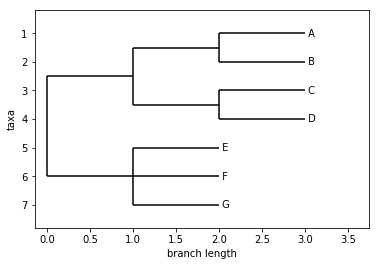

In [10]:
tree.rooted = True
Phylo.draw(tree)

Se puede cambiar los colores de las ramas, y agregar etiquetas (nombres)

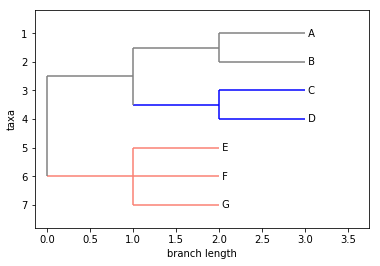

In [11]:
tree.root.color = "#808080"
mrca = tree.common_ancestor({"name": "E"}, {"name": "F"})
mrca.color = "salmon"
tree.clade[0, 1].color = "blue"
Phylo.draw(tree)

In [12]:
tree2 = Phylo.parse("data/phyloxml_examples.xml", "phyloxml")
trees = list(tree2)
for tree in trees:
    print(tree)
    #Phylo.draw(tree)

Phylogeny(description='phyloXML allows to use either a "branch_length" attribute...', name='example from Prof. Joe Felsenstein's book "Inferring Phyl...', rooted=True)
    Clade()
        Clade(branch_length=0.06)
            Clade(branch_length=0.102, name='A')
            Clade(branch_length=0.23, name='B')
        Clade(branch_length=0.4, name='C')
Phylogeny(description='phyloXML allows to use either a "branch_length" attribute...', name='example from Prof. Joe Felsenstein's book "Inferring Phyl...', rooted=True)
    Clade()
        Clade(branch_length=0.06)
            Clade(branch_length=0.102, name='A')
            Clade(branch_length=0.23, name='B')
        Clade(branch_length=0.4, name='C')
Phylogeny(name='same example, with support of type "bootstrap"', rooted=True)
    Clade()
        Clade(branch_length=0.06, name='AB')
            Confidence(type='bootstrap', value=89.0)
            Clade(branch_length=0.102, name='A')
            Clade(branch_length=0.23, name='B')
       

De esta forma se puede iterar sobre la lista de árboles y escribir en archivos separados.

In [ ]:
tree1 = trees[0]
Phylo.write(tree1, "data/tree1.nwk", "newick")

others = trees[1:]
Phylo.write(others, "data/other_trees.nwk", "newick")

Y también se pueden convertir a otro formato

In [ ]:
Phylo.convert("data/tree1.nwk", "newick", "data/tree1.xml", "nexml")

# Bases de datos del NCBI

Entrez es el sistema que provee de acceso a las bases de datos de NCBI, como PubMed, GenBack, GEO y otras.

El modulo `Bio.Entrez` hace uso de las utilidadesde de Entrez, que consiste en 8 herramientas, se pueden ver el la siguiente página: http://www.ncbi.nlm.nih.gov/entrez/utils/



In [ ]:
from Bio import Entrez
Entrez.email = "cgamboa@cenat.ac.cr" #necesario para acceder a las bases de datos

NCBI usará el email del usuario para bloquear el acceso en caso de uso excesivo

In [ ]:
from Bio import Entrez
Entrez.email = "cgamboa@cenat.ac.cr"     # Always tell NCBI who you are
handle = Entrez.einfo()
result = handle.read()
print(result)

Lo anterior es una estructura XML simple, por lo que se puede extraer información con las herramientas de BioPython

In [ ]:
from Bio import Entrez
handle = Entrez.einfo()
record = Entrez.read(handle)

In [ ]:
record.keys()

Bajo la llave `DbList` existe una lista con los nombres de las bases de datos

In [ ]:
record["DbList"]

In [ ]:
handle = Entrez.einfo(db="pubmed")
record = Entrez.read(handle)
record["DbInfo"]["Description"]

In [ ]:
record['DbInfo'].keys()

In [ ]:
print("Count ", record["DbInfo"]["Count"])
print("Las Update ", record["DbInfo"]["LastUpdate"])

### Buscando en las bases de datos con ESearch 

In [ ]:
from Bio import Entrez
Entrez.email = "cgamboa@cenat.ac.cr"     # siempre indicar quien es uno
handle = Entrez.esearch(db="pubmed", term="biopython")
record = Entrez.read(handle)
record["IdList"]

In [ ]:
record

### Descargando datos completos con EFetch

Se usa para descargar los archivos completos de las bases de datos: 
[EFetch Help page](http://eutils.ncbi.nlm.nih.gov/entrez/query/static/efetch_help.html).

La documentación de la herramienta se puede estudiar con detalle en la página: 
[NCBI efetch webpage](http://www.ncbi.nlm.nih.gov/entrez/query/static/efetch_help.html)


Ejemplo:  Selenipedium aequinoctiale Cypripedioideae


In [ ]:
from Bio import Entrez
Entrez.email = "cgamboa@cenat.ac.cr"    
handle = Entrez.efetch(db="nucleotide", id="186972394", rettype="gb", retmode="text")
print(handle.read())

Se puede leer los datos directamente a un objeto SeqIO

In [ ]:
from Bio import Entrez, SeqIO
handle = Entrez.efetch(db="nucleotide", id="186972394", rettype="gb", retmode="text")
record = SeqIO.read(handle, "genbank")
handle.close()
print(record)

Comunmente lo mejor es guardar los datos en un archivo local

In [ ]:
import os
from Bio import SeqIO
from Bio import Entrez
Entrez.email = "cgamboa@cenat.ac.cr"     # Always tell NCBI who you are
filename = "gi_186972394.gbk"
if not os.path.isfile(filename):
    # Descargando ...
    with Entrez.efetch(db="nucleotide",id="186972394",rettype="gb", retmode="text") as net_handle:
        with open(filename, "w") as out_handle:
            out_handle.write(net_handle.read())
        print("Saved")

print("Parsing...")
record = SeqIO.read(filename, "genbank")
print(record)